# Part I - (Gobike Data Exploration)
## By Anas saleh basalamah

## Introduction

over the last decade, bicycle-sharing structures are developing in variety and reputation in cities throughout the globe.
Bicycle-sharing systems permit customers to hire bicycles for quick visits, usually half of-hour or much less. thanks to the increase in data technologies, it is simple for a user of the system to get entry to a dock at intervals the gadget to unlock or come bicycles. these technologies additionally give a wealth of expertise that may be wont to discover however these motorcycle-sharing structures location unit used. on this mission, i will perform an exploratory analysis of records supplied through Ford GoBike, a motorbike-proportion machine company.


### Preliminary Wrangling
This data is for ride facts of the ford gobike for 2018 and Contains 17,548,339  




In [26]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import datetime

%matplotlib inline

### Data format :

- Trip Duration (seconds)
- Start Time and Date
- Stop Time and Date
- Start Station Name
- End Station Name
- Station ID
- Station Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth

In [27]:
## read multiply csv files
path = r'D:\Downloads\Last project' 
csv_files = glob.glob(path + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
all_df   = pd.concat(df_list, ignore_index=True)

In [16]:
##all_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [17]:
## drop unnecessary columns
all_df = all_df.drop(['bike_share_for_all_trip',],axis=1)

In [18]:
col = ['tripduration'	,'starttime'	,'stoptime'	,'start station id'	,'start station name'	,
       'start station latitude'	,'start station longitude',	'end station id'	,'end station name',	'end station latitude'	,'end station longitude',	'bikeid',	'usertype'	,'birth year'	,
       'gender']
all_df.set_axis(col, axis=1,inplace=True)

In [28]:
## drop unnecessary columns
all_df = all_df.drop(['start station latitude','start station longitude','end station latitude','end station longitude'],axis=1)

In [29]:
## replace Gender (Zero=unknown; 1=male; 2=female) 
all_df.gender = all_df.gender.replace({1:'male'})
all_df.gender = all_df.gender.replace({2:'female'})
all_df.gender = all_df.gender.replace({0:'unknown'})

In [30]:
## convert trip duration from sec to min
all_df['tripduration'] = all_df['tripduration']/60

In [31]:
## remove decimals from start station id & end station id columns
all_df['start station id'] = all_df['start station id'].astype(str).apply(lambda x: x.replace('.0',''))
all_df['end station id'] = all_df['end station id'].astype(str).apply(lambda x: x.replace('.0',''))

In [32]:
## get the age 
all_df['age']= 2023-all_df['birth year']

In [33]:
## convrt type to datetime
all_df['starttime']= pd.to_datetime(all_df['starttime'])
all_df['stoptime']= pd.to_datetime(all_df['stoptime'])

In [34]:
## add hours columns & month & day
all_df['Start_hour']= all_df['starttime'].dt.hour.astype(str)
all_df['stop_hour']= all_df['stoptime'].dt.hour.astype(str)
all_df['start_Day']= all_df['starttime'].dt.day_name()
all_df['start_monht']= all_df['stoptime'].dt.month_name()
all_df['starttime']= all_df['starttime'].dt.strftime('%Y-%m-%d')
all_df['stoptime']= all_df['stoptime'].dt.strftime('%Y-%m-%d')

In [35]:
all_df.head()

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,Start_hour,stop_hour,start_Day,start_monht
0,16.166667,2018-01-01,2018-01-01,72,W 52 St & 11 Ave,505,6 Ave & W 33 St,31956.0,Subscriber,1992.0,...,NaN,NaN,NaN,NaN,NaN,31.0,13.0,14.0,Monday,January
1,12.050000,2018-01-01,2018-01-01,72,W 52 St & 11 Ave,3255,8 Ave & W 31 St,32536.0,Subscriber,1969.0,...,NaN,NaN,NaN,NaN,NaN,54.0,15.0,15.0,Monday,January
2,8.266667,2018-01-01,2018-01-01,72,W 52 St & 11 Ave,525,W 34 St & 11 Ave,16069.0,Subscriber,1956.0,...,NaN,NaN,NaN,NaN,NaN,67.0,15.0,15.0,Monday,January
3,5.100000,2018-01-01,2018-01-01,72,W 52 St & 11 Ave,447,8 Ave & W 52 St,31781.0,Subscriber,1974.0,...,NaN,NaN,NaN,NaN,NaN,49.0,15.0,15.0,Monday,January
4,5.100000,2018-01-01,2018-01-01,72,W 52 St & 11 Ave,3356,Amsterdam Ave & W 66 St,30319.0,Subscriber,1992.0,...,NaN,NaN,NaN,NaN,NaN,31.0,18.0,18.0,Monday,January


In [36]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17731751 entries, 0 to 17731750
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             float64
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         object 
 4   start station name       object 
 5   end station id           object 
 6   end station name         object 
 7   bikeid                   float64
 8   usertype                 object 
 9   birth year               float64
 10  gender                   object 
 11  duration_sec             float64
 12  start_time               object 
 13  end_time                 object 
 14  start_station_id         float64
 15  start_station_name       object 
 16  start_station_latitude   float64
 17  start_station_longitude  float64
 18  end_station_id           float64
 19  end_station_name         object 
 20  end_station_latitude     float64
 21  end_st

In [37]:
all_df.to_csv(r'D:\Downloads\Last project\Project Template\alloutput.csv',index=False)

### What is the structure of your dataset?

- Trip Duration (minute)
- Start Time and Date
- Stop Time and Date
- Start Station Name
- End Station Name
- Station ID
- Bike ID
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth

### What is/are the main feature(s) of interest in your dataset?
- Start Time and Date
- Stop Time and Date
- Trip Duration (minute)
- Station ID
- Bike ID

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth
- age
- Trip_month
- trip_day

## Univariate Exploration


In [70]:
### to crate bat chart

def plot_x(column_name,x_lable,x_title,y_lable):
    all_df[column_name].value_counts().plot(kind='bar');
    plt.xlabel(""+x_lable+"");
    plt.xticks(rotation=0);
    plt.title(""+x_title+"", fontsize=19)
    plt.ylabel(""+y_lable+"");

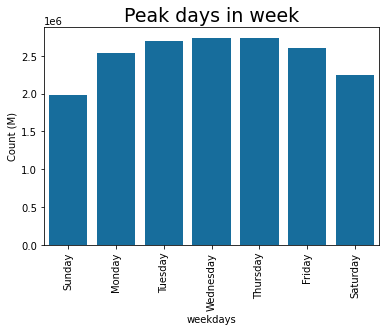

In [38]:
weekdays = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
weekdayorder = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
all_df['start_Day'] = all_df['start_Day'].astype(weekdayorder)
sb.countplot(data=all_df, x='start_Day', color=sb.color_palette('colorblind')[0]);
plt.xticks(rotation=90);
plt.ylabel('Count (M)');
plt.title('Peak days in week', fontsize=19)
plt.xlabel('weekdays');


##### It became exciting to note that there are not any great variations in overall day by day trips matter over week days besides for moderate lower for the duration of weekends

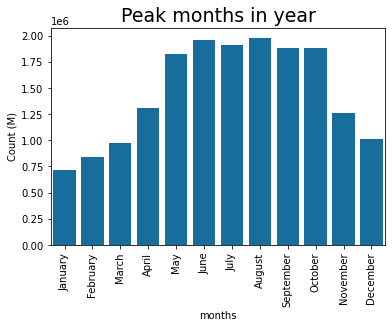

In [39]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthorders = pd.api.types.CategoricalDtype(ordered=True, categories=months)
all_df['start_monht'] = all_df['start_monht'].astype(monthorders)
sb.countplot(data=all_df, x='start_monht', color=sb.color_palette('colorblind')[0]);
plt.ylabel('Count (M)');
plt.title('Peak months in year', fontsize=19)
plt.xlabel('months');
plt.xticks(rotation=90);

###### the whole monthly trips suggests unimodal distribution that peaks around summer season months

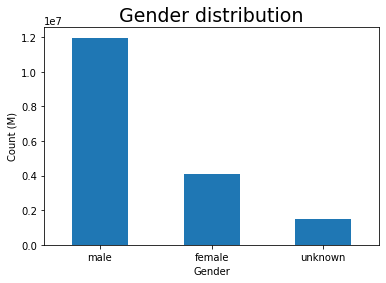

In [72]:
plot_x('gender','Gender','Gender distribution','Count (M)')

###### The subscribers be counted is ready three folds of the customers be counted, and the male users are extra than 2 folds of women thinking about that there is a 200K customers did not point out their gender, the connection between customers sorts ought to be explored similarly

In [15]:
all_df_age = all_df.loc[all_df['age']<=90]

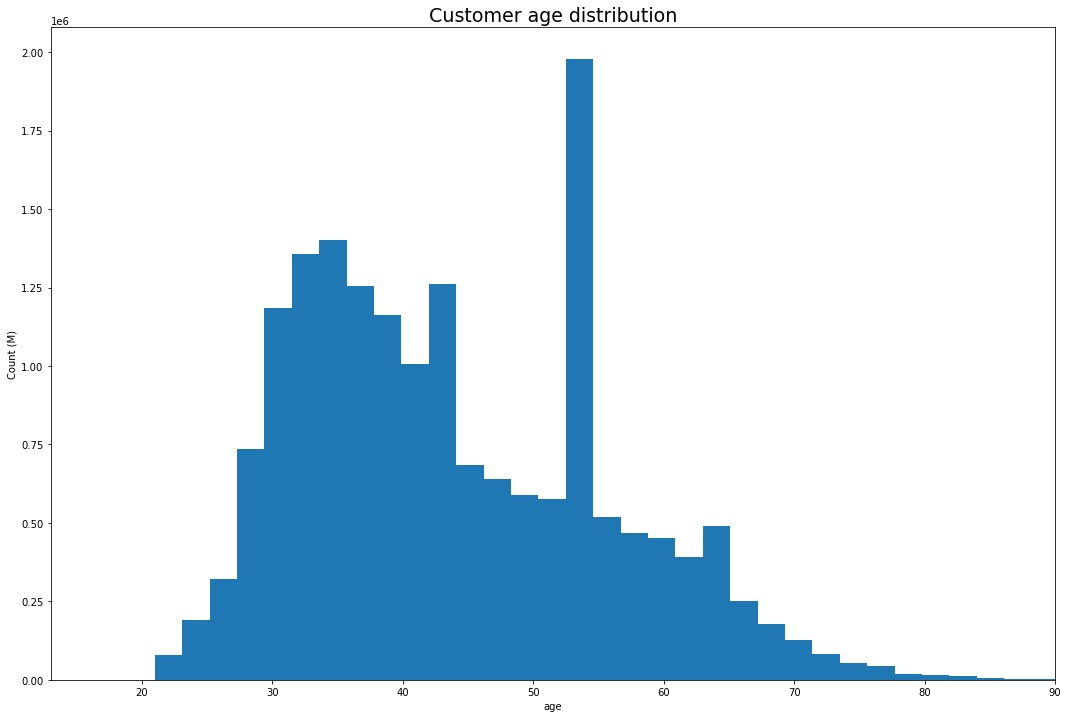

In [16]:
plt.figure(figsize=(18, 12))
bin_edges = np.arange(0, all_df_age.age.max()+2.1, 2.1)
plt.hist(data=all_df_age, x='age', bins=bin_edges);
plt.xlim(13, 90);
plt.xlabel('age');
plt.title('Customer age distribution', fontsize=19)
plt.ylabel('Count (M)');

###### while exploring the age distribution of customers, outliers had been detected above age of 80 with maximum cost of 155 years! which does not make experience and can suggest faulty input of customers beginning 12 months, so age values above 80 have been excluded to higher understand this variable
###### Anonther exciting observation turned into that there has been a surge in the age distribution round age of 50 years

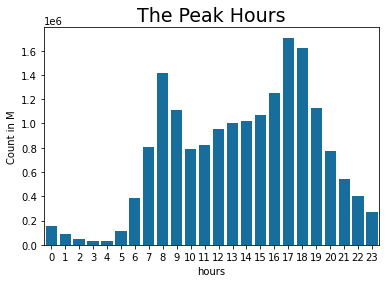

In [17]:
hour = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hour_order = pd.api.types.CategoricalDtype(ordered=True, categories=hour)
all_df['Start_hour'] = all_df['Start_hour'].astype(hour_order)
sb.countplot(data=all_df, x='Start_hour', color=sb.color_palette('colorblind')[0]);
plt.title('The Peak Hours', fontsize=19)
plt.ylabel('Count in M');
plt.xlabel('hours');


##### there is bimodal distribution of journeys over hours over the day with three peaks, the first is on the morning hours round 8 AM, and the second one is on the night hours round 17 PM

Text(0, 0.5, 'Count')

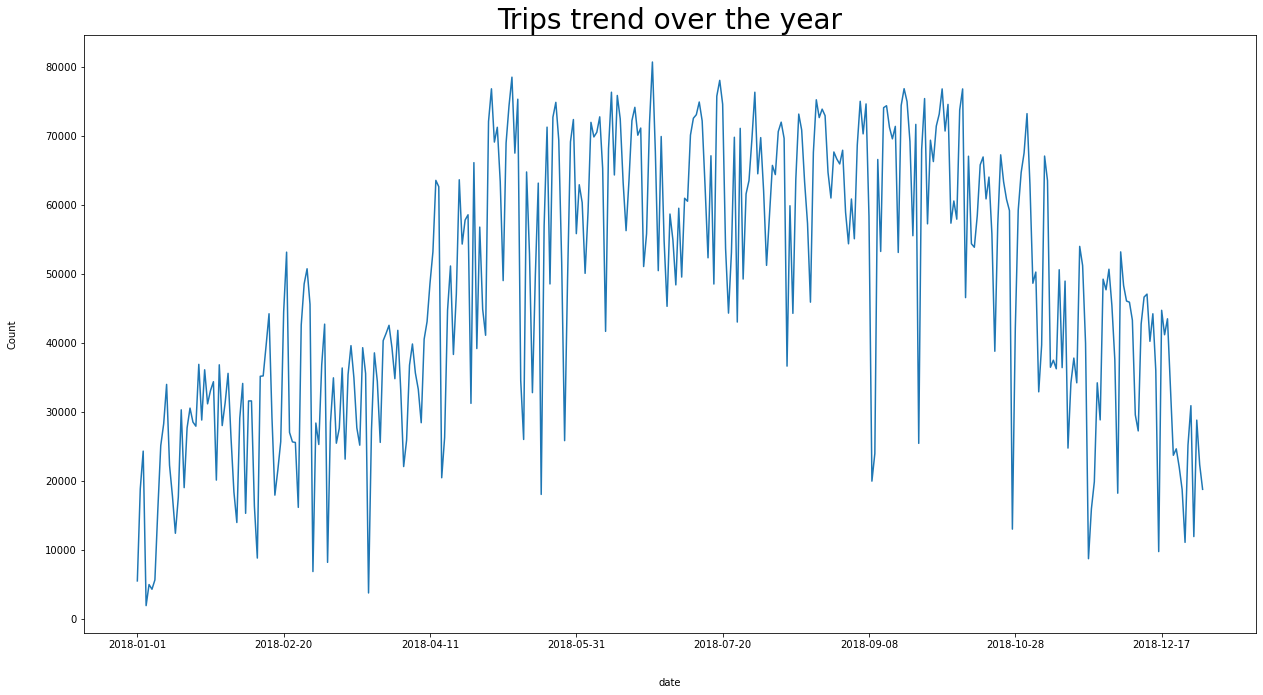

In [18]:
all_df.groupby('starttime').agg({'bikeid':'count'}).plot( legend=False, figsize=(21,11))
plt.title('Trips trend over the year', fontsize=28)
plt.xlabel('date', labelpad=28)
plt.ylabel('Count', labelpad=28)

##### As we can see it was increasing trend in the beginning of the year and from November Trips strat decarced

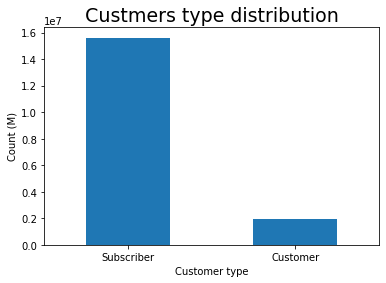

In [73]:
plot_x('usertype','Customer type','Custmers type distribution','Count (M)')

###### the Subscriber are greater than the customer .

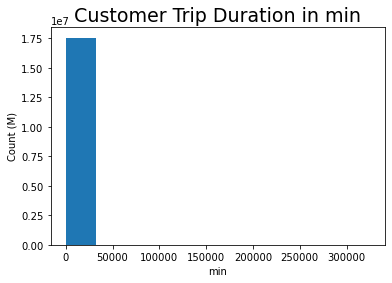

In [20]:
plt.hist(all_df['tripduration'])
plt.xlabel('min');
plt.title('Customer Trip Duration in min', fontsize=19)
plt.ylabel('Count (M)');

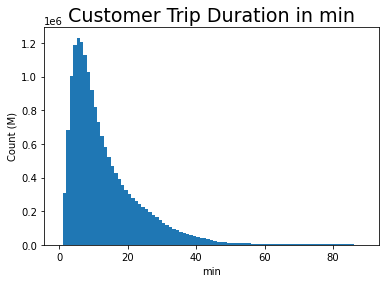

In [21]:
plt.hist(all_df['tripduration'],bins=range(0,90))
plt.xlabel('min');
plt.title('Customer Trip Duration in min', fontsize=19)
plt.ylabel('Count (M)');

######  It look like the most  of the trips have been less than 1 hour lengthy with most of them fell between 1 to 20 minutes range.  

In [22]:
top10_station = all_df['start station name'].value_counts().head(10)
top10_station = pd.DataFrame(top10_station)
top10_station = top10_station.reset_index()
inedx = top10_station['index']

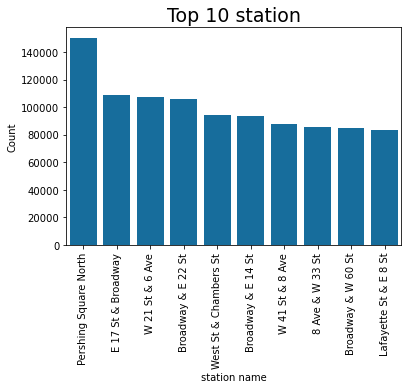

In [23]:
type_order = pd.api.types.CategoricalDtype(ordered=True, categories=inedx)
all_df['start station name'] = all_df['start station name'].astype(type_order)
sb.countplot(data=all_df, x='start station name', color=sb.color_palette('colorblind')[0]);
plt.xticks(rotation=90);
plt.title('Top 10 station', fontsize=19)
plt.xlabel('station name');

plt.ylabel('Count');

##### as we can see above the top  station the first one is is Pershing Square North and the scend is E 17 St & Broadway and the third one is W 21 St & 6 Ave

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The range of trips peaked round 8-9am and 17-18pm at some stage in an afternoon, there had been more journeys on paintings days (Mon-Fri) in comparison to weekends. Summar time turned into the maximum popular season of a 12 months, possibly because of the weather.

person-wise, there were more male riders than woman, and most individuals were subscribers in comparison to informal riders. most people of the participants did now not use motorcycle percentage for all of their journeys, and maximum had been around 25 to forty years old.

maximum rides had been short and short, lasted among 1 to 20 minutes, even though there have been a few very long outliers like 24hours.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of the journey length turned into a touch sudden at first plotting out the original records. Used .describe() and xticks() to zoom in to a smaller variety in which most journey facts fell, which made the distribution plenty clearer. with the intention to assist that specialize in the main instances of ordinary use of the machine, I filtered out the outlier long trip information for the examine with .question().

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [25]:
color = sb.color_palette('colorblind')[0]

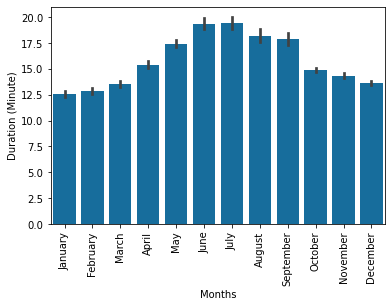

In [27]:
sb.barplot(data=all_df, x='start_monht', y='tripduration',color=sb.color_palette('colorblind')[0]);
plt.xlabel('Months');
plt.xticks(rotation=90);
plt.ylabel('Duration (Minute)');

###### starting from March, the common usage time proven an growing trend nearly all the way til October before it down turned. The average longest journeys happened all through the summer time months, round June, July and September, which likely has loads to do with the climate in the location.

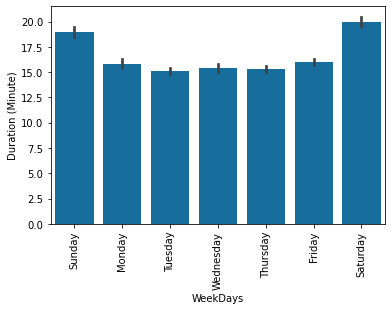

In [28]:
sb.barplot(data=all_df, x='start_Day', y='tripduration',color=sb.color_palette('colorblind')[0]);
plt.xlabel('WeekDays');
plt.xticks(rotation=90);
plt.ylabel('Duration (Minute)');

###### The riding journeys are a lot shorter on Monday through Friday as compared to weekends. It indicates a pretty strong and green utilization of the sharing device on everyday work days, while greater casual flexible use on weekends.

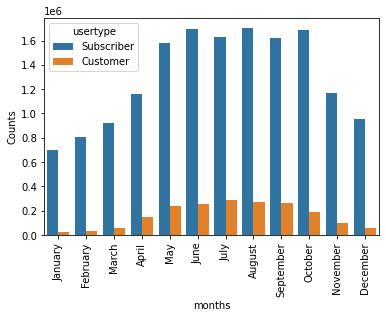

In [29]:
sb.countplot(data=all_df, x='start_monht', hue='usertype');
plt.xlabel('months');
plt.xticks(rotation=90);
plt.ylabel('Counts');

###### there has been much extra subscriber usage than informal customers overall. The drop of extent on weekends for subscribers indicates that they usually journey motorcycles for work shuttle during paintings days, while almost the opposite pattern of a mild boom of use for clients on weekends demonstrates that the use was more for enjoyment/journeying and relaxing functions.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
There are loads greater subscriber usage than clients. The riding dependancy/sample varies lots between subscribers and clients. Subscribers use the bike sharing machine for paintings commnute thus most journeys had been on paintings days (Mon-Fri) and specifically during rush hours (when going to work inside the morning and getting off work within the afternoon), while customers tend to trip for amusing within the afternoon or early evenings over weekends. Subscriber users are barely older than consumer users who have a tendency to take longer rides universal particularly in the course of the summer season.it's miles thrilling to peer that subscribers are slightly older than customers on average but take much shorter/quicker rides. And October had the maximum bike driving usage for subscribers at some stage in the 12 months.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

it's miles thrilling to peer that subscribers are slightly older than customers on average but take much shorter/quicker rides. And aug had the maximum bike driving usage for subscribers at some stage in the 12 months.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

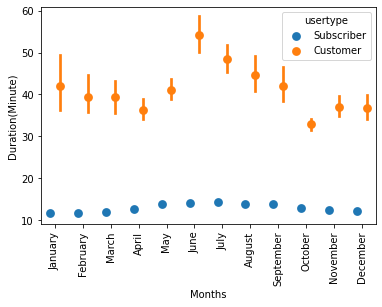

In [30]:
sb.pointplot(data=all_df, x='start_monht', y='tripduration', hue='usertype', dodge=0.34, linestyles="");
plt.xlabel('Months');
plt.xticks(rotation=90);
plt.ylabel('Duration(Minute)');

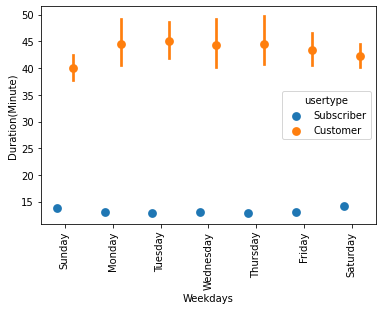

In [31]:
sb.pointplot(data=all_df, x='start_Day', y='tripduration', hue='usertype', dodge=0.34, linestyles="");
plt.xlabel('Weekdays');
plt.xticks(rotation=90);
plt.ylabel('Duration(Minute)');

##### customers travel very longer distance regardless the day of the week(longest on weekends) while subscribers typically tour brief distance with litle boom on weekends but no longer as much as that of the customers.

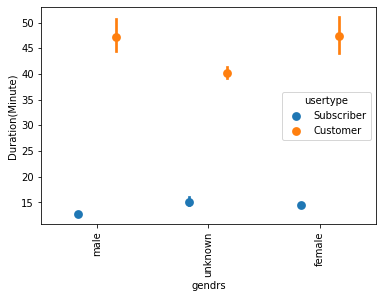

In [32]:
sb.pointplot(data=all_df, x='gender', y='tripduration', hue='usertype', dodge=0.34, linestyles="");
plt.xlabel('gendrs');
plt.xticks(rotation=90);
plt.ylabel('Duration(Minute)');

###### the other gender organization travels for the longest length for bike sharing and non bike sharing, observed by lady, then, male

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I determined that despite the fact that the range of customers for male is better however percent is higher for women and different in trip period. And,for the others bounce at an older age (around 60 years) to were given 3000 ride duration which is a height. additionally, for subscribers the experience length is better than purchaser for older age.

### Were there any interesting or surprising interactions between features?

looking returned at the plots, leaping for different gender at an older is a wonder. And, for subscribers the experience period is higher than client for older age is a surprise

## Conclusions
The dataset for  2018


most journeys had been taken on Thursdays and Tuesdays

Weekends have the least trip facts

the push hours; going to paintings in the morning (8 and nine hrs) and last in the evening (17 and 18 hrs) have the highest ride statistics

approximately ninety% of the trips had been taken via subscribers


clients spend more period than subscribers

females spend extra period than males

ride intervals on weekends are longer than on other weekdays


client kind does not honestly affect the quantity of journeys in line with weekday

customers travel for longer durations regardless of the day of the week as compared to subscribers.
